# Erdos Renyi random graph with Python - some examples

### Import needed Packages

In [2]:
import numpy as np
import math
import networkx as net
import matplotlib.pyplot as plt
from pyvis.network import Network as netviz

### Set parameters for the random Graph

In [3]:
N = 100
p = 0.05

### Generate random Graph as `G`

In [4]:
G = net.gnp_random_graph(N,p)

### Check if the Graph is connected and if not choose the largest connected component as `G0`

In [5]:
conn = net.is_connected(G)

if conn:
    print("the graph is connected")
    G0 = G
else:
    GCC = sorted(net.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(GCC[0])
    print("the graph is not connected")

n = len(G0)
print("number of vertices in G0 is %d" %n)

the graph is not connected
number of vertices in G0 is 99


### collect the degrees of `G0` in a list

In [6]:
deg = {}   # initialize an empty dictionary
for v in G0.nodes():
    deg[v] = net.degree(G0,v)
print(deg)
deg_val = deg.values()

{0: 6, 1: 3, 2: 6, 3: 8, 4: 4, 5: 6, 6: 7, 7: 3, 8: 4, 9: 1, 10: 10, 12: 6, 13: 6, 14: 6, 15: 2, 16: 4, 17: 3, 18: 8, 19: 7, 20: 4, 21: 1, 22: 4, 23: 4, 24: 4, 25: 4, 26: 6, 27: 6, 28: 9, 29: 7, 30: 5, 31: 8, 32: 4, 33: 4, 34: 3, 35: 6, 36: 3, 37: 8, 38: 4, 39: 7, 40: 8, 41: 4, 42: 4, 43: 5, 44: 3, 45: 8, 46: 7, 47: 3, 48: 2, 49: 7, 50: 5, 51: 7, 52: 2, 53: 8, 54: 2, 55: 3, 56: 3, 57: 6, 58: 5, 59: 2, 60: 2, 61: 4, 62: 7, 63: 2, 64: 5, 65: 6, 66: 8, 67: 4, 68: 2, 69: 3, 70: 7, 71: 1, 72: 9, 73: 4, 74: 5, 75: 5, 76: 4, 77: 1, 78: 6, 79: 3, 80: 3, 81: 10, 82: 2, 83: 7, 84: 4, 85: 6, 86: 5, 87: 5, 88: 8, 89: 4, 90: 4, 91: 5, 92: 4, 93: 4, 94: 7, 95: 2, 96: 3, 97: 2, 98: 7, 99: 5}


### Add a property `size` to each vertex depending on the degree of the vertex

In [7]:
for v in G0.nodes():
    G0.nodes[v]["size"] = math.sqrt(deg[v])*10

### Plot a Histogram of the degrees in `G0`

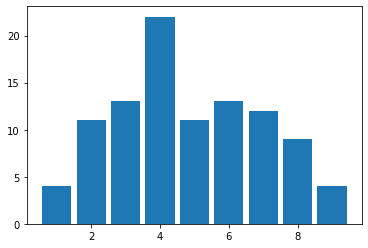

In [8]:
num, bins, obj = plt.hist(deg_val, bins=max(deg_val)-min(deg_val), align="left", rwidth=0.85)

### Visualize graph

In [9]:
viz = netviz(height=800, width=800, notebook=True)
viz.barnes_hut()
viz.from_nx(G0)
viz.show("net.html")